# Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

1. **Polynomial Functions:**
   - In machine learning, polynomial functions are often used to map data from a lower-dimensional space to a higher-dimensional space. This process is known as polynomial feature expansion.
   - Polynomial features are used to capture complex relationships between input features. For example, in polynomial regression, polynomial features are created to model nonlinear relationships between the independent and dependent variables.
   - Polynomial functions allow us to represent complex decision boundaries in higher-dimensional feature spaces.

2. **Kernel Functions:**
   - Kernel functions are mathematical functions that compute the similarity or distance between pairs of data points in a potentially high-dimensional feature space.
   - The key idea behind kernel methods is to compute inner products (similarity measures) between data points in the transformed feature space without explicitly transforming the data.
   - Popular kernel functions include linear kernel, polynomial kernel, Gaussian (RBF) kernel, sigmoid kernel, etc.

3. **Relationship:**
   - Polynomial kernels in SVMs leverage the concept of polynomial functions to compute the inner product of feature vectors in a higher-dimensional space.
   - Instead of explicitly transforming the data into a higher-dimensional space, polynomial kernel functions compute the inner product directly using the original feature space.
   - OPolynomial kernels essentially provide a way to capture nonlinear relationships between data points in a higher-dimensional space without explicitly computing the coordinates of the data in that space.

# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [12]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns


iris = datasets.load_iris()
X = iris.data
y = iris.target



<Axes: xlabel='0', ylabel='1'>

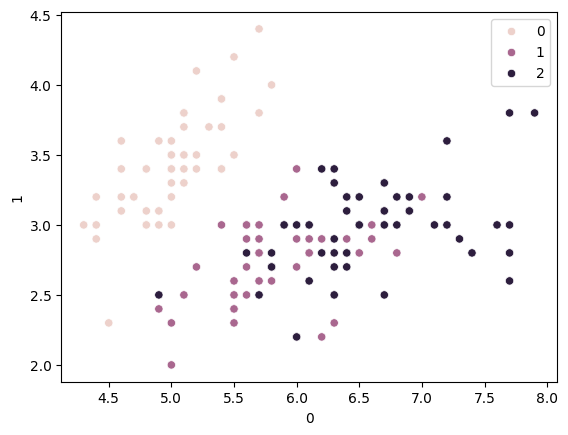

In [13]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=46)

svm = SVC(kernel='poly')  
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9333333333333333


In [17]:
from sklearn.metrics import r2_score
y_pred=svm.predict(X_test)
print(r2_score(y_test,y_pred))

0.8991172761664564


# Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter epsilon (ε) determines the width of the margin within which no penalty is associated with points predicted within the margin. 

1. **More Tolerance for Errors:**
   - When epsilon is increased, SVR becomes more tolerant of errors. 
   - Points within the margin or within a distance of epsilon from the predicted values are considered to be correctly predicted and do not contribute to the error term in the objective function.

2. **Impact on Margin and Support Vectors:**
   - A wider margin means that more data points might fall within the margin or within a distance of epsilon from the predicted values.
   - As a result, fewer data points are likely to become support vectors since there's more flexibility in finding a solution that satisfies the margin constraints.

3. **Reduced Complexity:**
   - With a wider margin, the model is less sensitive to individual data points, leading to potentially simpler models.
   - This reduction in complexity may lead to fewer support vectors as the model does not need to rely on as many data points to define the margin and the regression function.

4. **Generalization and Overfitting:**
   - Increasing epsilon can also help in reducing the risk of overfitting by allowing more flexibility in the fitting process.
   - A wider margin allows the model to generalize better to unseen data, potentially leading to improved performance on test data.

#  Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) performance is heavily influenced by several parameters: the choice of kernel function, the C parameter, the epsilon parameter (ε), and the gamma parameter (γ). Each parameter plays a crucial role in shaping the model's complexity, flexibility, and generalization ability. Let's discuss each parameter and its impact:

1. **Kernel Function:**
   - The kernel function determines how the input features are transformed into a higher-dimensional space where SVR attempts to find a linear relationship between the transformed features and the target variable.
   - The choice of kernel function depends on the dataset and the underlying relationship between the features and the target variable. For example:
     - Use a linear kernel if the relationship between features and target is expected to be approximately linear.
     - Use a polynomial kernel for capturing nonlinear relationships with higher flexibility (adjusting the degree of the polynomial).

2. **C Parameter:**
   - A small C value encourages a wider margin at the cost of allowing more training errors (soft margin).
   - A large C value penalizes margin violations heavily, potentially leading to a narrower margin and fewer training errors (hard margin).
   - Increase C when you suspect the data might not be easily separable, or you want to reduce the training error at the expense of a narrower margin.
   - Decrease C when you prefer a wider margin and tolerate more training errors to improve generalization.

3. **Epsilon Parameter (ε):**
   - The epsilon parameter defines the width of the margin around the predicted values within which no penalty is associated with the error.
   - A larger epsilon value increases the tolerance for errors, allowing more data points to be within the margin.
   - Increase epsilon when you want to allow for more flexibility in fitting the model and tolerate larger errors.
   - Decrease epsilon when you want the model to be more sensitive to errors and have a tighter fit around the predicted values.

4. **Gamma Parameter (γ):**
   - A small gamma value implies a smoother decision boundary, with points farther apart having similar influence.
   - A large gamma value results in a more complex decision boundary, with points closer to the support vectors having higher influence.
   - Increase gamma when you suspect the dataset might have complex nonlinear relationships and you want the decision boundary to be more sensitive to individual data points.
   - Decrease gamma to make the decision boundary smoother and more robust to noise or when dealing with a large dataset to avoid overfitting.

# Q5. Assignment:
- Import the necessary libraries and load the dataset
- Split the dataset into training and testing sets
- Preprocess the data using any technique of your choice (e.g. scaling, normalization)
- Create an instance of the SVC classifier and train it on the training data
- Use the trained classifier to predict the labels of the testing data
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
- Tune the hyperparameters of the SVC classifier using GridSearchCV or and RandomizedSearchCV to improve its performance
- Train the tuned classifier on the entire dataset
- Save the trained classifier to a file for future use.

In [2]:
# Import the necessary libraries and load the dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [9]:
# Preprocess the data using any technique of your choice (e.g. scaling, normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create an instance of the SVC classifier and train it on the training data
# Use the trained classifier to predict the labels of the testing data
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)
y_pred = svc_classifier.predict(X_test_scaled)

In [11]:
# Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [12]:
# Tune the hyperparameters of the SVC classifier using GridSearchCV or and RandomizedSearchCV to improve its performance
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [13]:
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [15]:
# Train the tuned classifier on the entire dataset
tuned_svc_classifier = SVC(**grid_search.best_params_)
tuned_svc_classifier.fit(X_train_scaled, y_train)


SVC(C=1, gamma=0.1)

In [20]:
import joblib
# Save the trained classifier to a file for future use.
joblib.dump(tuned_svc_classifier, 'tuned_svc_classifier_joblib.pkl')

['tuned_svc_classifier_joblib.pkl']

In [18]:
import pickle
with open('tuned_svc_classifier_pickle.pkl', 'wb') as f:
    pickle.dump(tuned_svc_classifier, f)